In [1]:
# PROBLEM STATEMENT - RAINFALL PREDICTION
# Predict tomorrow's rainfall using dataset available for area : Australia
# Rainfall Prediction is one of the difficult and uncertain tasks that have a significant impact on human society. Timely and accurate forecasting can proactively help reduce human and financial loss. 
# Do a set of experiments that involve the use of common machine learning techniques to create models that can predict whether it will rain tomorrow or not based on the weather data for that day in major cities in Australia.

In [2]:
# IMPORTING PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk

In [3]:
# IMPORTING DATASET
data=pd.read_csv("weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
data1 = data.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
data1

RainTomorrow,No,Yes
Location,,
Adelaide,2402,688
Albany,2114,902
Albury,2393,618
AliceSprings,2787,244
BadgerysCreek,2345,583
Ballarat,2247,781
Bendigo,2472,562
Brisbane,2452,709
Cairns,2038,950


In [5]:
data_Albury = data[data['Location']=='Albury']

In [6]:
# TECHNICAL SUMMARY OF DATASET
data_Albury.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 0 to 3039
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3040 non-null   object 
 1   Location       3040 non-null   object 
 2   MinTemp        3029 non-null   float64
 3   MaxTemp        3029 non-null   float64
 4   Rainfall       3011 non-null   float64
 5   Evaporation    0 non-null      float64
 6   Sunshine       0 non-null      float64
 7   WindGustDir    3008 non-null   object 
 8   WindGustSpeed  3008 non-null   float64
 9   WindDir9am     2515 non-null   object 
 10  WindDir3pm     2994 non-null   object 
 11  WindSpeed9am   3031 non-null   float64
 12  WindSpeed3pm   3029 non-null   float64
 13  Humidity9am    3031 non-null   float64
 14  Humidity3pm    3032 non-null   float64
 15  Pressure9am    3035 non-null   float64
 16  Pressure3pm    3032 non-null   float64
 17  Cloud9am       1289 non-null   float64
 18  Cloud3pm     

In [7]:
data_Albury.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3029.000000,3029.000000,3011.000000,0.0,0.0,3008.000000,3031.000000,3029.000000,3031.000000,3032.000000,3035.000000,3032.000000,1289.000000,1427.000000,3031.000000,3032.000000
mean,9.530604,22.640872,1.914115,NaN,NaN,32.977394,8.211151,14.382965,74.070604,47.869393,1018.369621,1015.760752,6.391001,5.406447,14.361135,21.373780
std,6.069485,7.794924,6.230014,NaN,NaN,13.378187,6.733319,7.202528,17.435775,19.817397,7.361873,7.113363,2.387684,2.832176,6.369793,7.519399
min,-2.800000,6.800000,0.000000,NaN,NaN,9.000000,0.000000,0.000000,18.000000,7.000000,989.800000,982.900000,0.000000,1.000000,0.300000,6.400000
25%,4.700000,15.800000,0.000000,NaN,NaN,24.000000,4.000000,9.000000,61.000000,33.000000,1013.400000,1010.700000,5.000000,2.000000,9.300000,14.900000
50%,9.100000,21.900000,0.000000,NaN,NaN,31.000000,7.000000,13.000000,76.000000,47.000000,1018.400000,1015.600000,8.000000,7.000000,14.100000,20.600000
75%,14.300000,28.900000,0.400000,NaN,NaN,41.000000,11.000000,19.000000,88.000000,60.000000,1023.300000,1020.500000,8.000000,8.000000,19.350000,27.200000
max,28.300000,44.800000,104.200000,NaN,NaN,107.000000,37.000000,50.000000,100.000000,100.000000,1039.900000,1036.100000,8.000000,8.000000,34.500000,43.400000


In [8]:
data_Albury.isna().sum()

Date                0
Location            0
MinTemp            11
MaxTemp            11
Rainfall           29
Evaporation      3040
Sunshine         3040
WindGustDir        32
WindGustSpeed      32
WindDir9am        525
WindDir3pm         46
WindSpeed9am        9
WindSpeed3pm       11
Humidity9am         9
Humidity3pm         8
Pressure9am         5
Pressure3pm         8
Cloud9am         1751
Cloud3pm         1613
Temp9am             9
Temp3pm             8
RainToday          29
RainTomorrow       29
dtype: int64

In [9]:
data_Albury=data_Albury.drop(data_Albury[['Evaporation','Sunshine','Cloud9am','Cloud3pm']],axis=1)
data_Albury

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2017-06-21,Albury,1.2,15.2,0.4,ENE,15.0,NaN,NNE,0.0,2.0,100.0,62.0,1029.4,1026.7,2.9,14.3,No,No
3036,2017-06-22,Albury,0.8,13.4,0.0,W,17.0,S,NaN,6.0,0.0,100.0,66.0,1029.4,1025.9,3.6,13.3,No,No
3037,2017-06-23,Albury,1.1,11.9,0.0,SE,44.0,SSE,SSE,9.0,2.0,100.0,81.0,1022.3,1017.7,2.7,10.2,No,No
3038,2017-06-24,Albury,1.1,14.1,0.2,WSW,28.0,SW,W,4.0,15.0,100.0,49.0,1018.8,1017.2,3.9,13.1,No,No


In [10]:
numerical_columns = [column for column in data_Albury.columns if data_Albury[column].dtypes != 'O']
categorical_columns = [column for column in data_Albury.columns if column not in numerical_columns]
print("Numerical Columns : ",len(numerical_columns))
print("Categorical Columns : ",len(categorical_columns))
categorical_columns

Numerical Columns :  12
Categorical Columns :  7


['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [11]:
for column in numerical_columns:
    if(data_Albury[column].isnull().sum()>0):
        data_Albury[column] = data_Albury[column].fillna(data_Albury[column].median())

In [12]:
data_Albury.isna().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir       32
WindGustSpeed      0
WindDir9am       525
WindDir3pm        46
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainToday         29
RainTomorrow      29
dtype: int64

In [13]:
print(data_Albury['WindGustDir'].mode())
print(data_Albury['WindDir3pm'].mode())
print(data_Albury['WindDir9am'].mode())
print(data_Albury['RainToday'].mode())
print(data_Albury['RainTomorrow'].mode())

0    W
Name: WindGustDir, dtype: object
0    W
Name: WindDir3pm, dtype: object
0    SE
Name: WindDir9am, dtype: object
0    No
Name: RainToday, dtype: object
0    No
Name: RainTomorrow, dtype: object


In [14]:
data_Albury['WindGustDir']=data_Albury['WindGustDir'].replace(np.NaN,'W')
print(data_Albury['WindGustDir'].isna().sum())
data_Albury['WindDir3pm']=data_Albury['WindDir3pm'].replace(np.NaN,'W')
print(data_Albury['WindDir3pm'].isna().sum())
data_Albury['WindDir9am']=data_Albury['WindDir9am'].replace(np.NaN,'SE')
print(data_Albury['WindDir9am'].isna().sum())
data_Albury['RainToday']=data_Albury['RainToday'].replace(np.NaN,'No')
print(data_Albury['RainToday'].isna().sum())
data_Albury['RainTomorrow']=data_Albury['RainTomorrow'].replace(np.NaN,'No')
print(data_Albury['RainTomorrow'].isna().sum())

0
0
0
0
0


In [15]:
data_Albury.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data_Albury['WindGustDir']=encoder.fit_transform(data_Albury['WindGustDir'])
data_Albury['WindDir3pm']=encoder.fit_transform(data_Albury['WindDir3pm'])
data_Albury['WindDir9am']=encoder.fit_transform(data_Albury['WindDir9am'])
data_Albury['RainToday']=encoder.fit_transform(data_Albury['RainToday'])
data_Albury['RainTomorrow']=encoder.fit_transform(data_Albury['RainTomorrow'])

In [17]:
data_Albury['WindGustDir']

0       13
1       14
2       15
3        4
4       13
        ..
3035     1
3036    13
3037     9
3038    15
3039     6
Name: WindGustDir, Length: 3040, dtype: int32

In [18]:
data_Albury['RainToday']

0       0
1       0
2       0
3       0
4       0
       ..
3035    0
3036    0
3037    0
3038    0
3039    0
Name: RainToday, Length: 3040, dtype: int32

In [19]:
data_Albury['WindDir3pm']

0       14
1       15
2       15
3        0
4        7
        ..
3035     5
3036    13
3037    10
3038    13
3039    13
Name: WindDir3pm, Length: 3040, dtype: int32

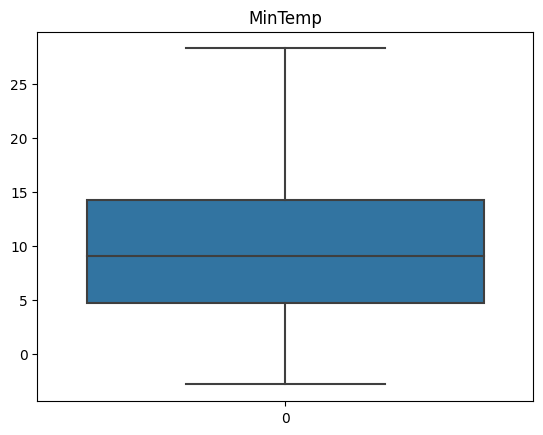

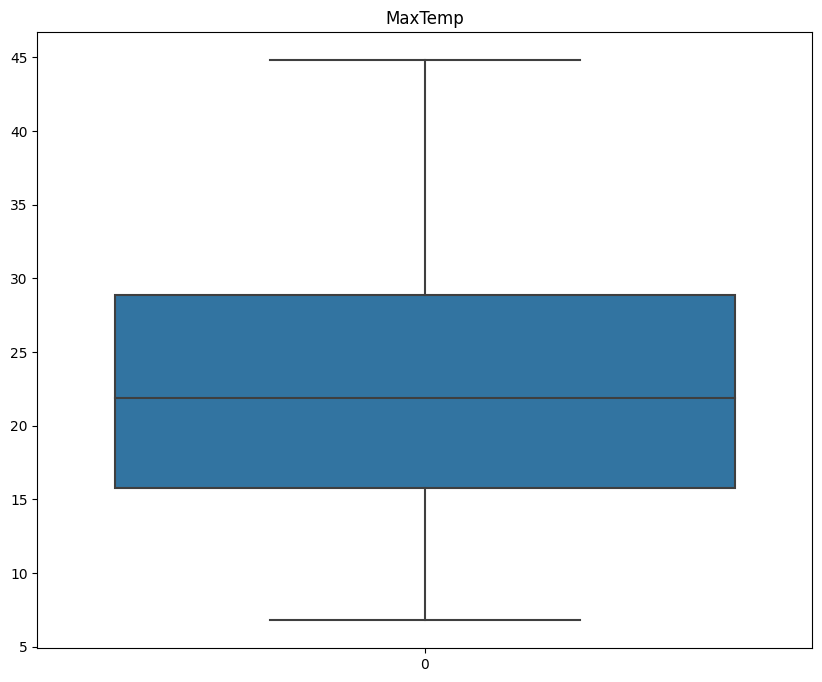

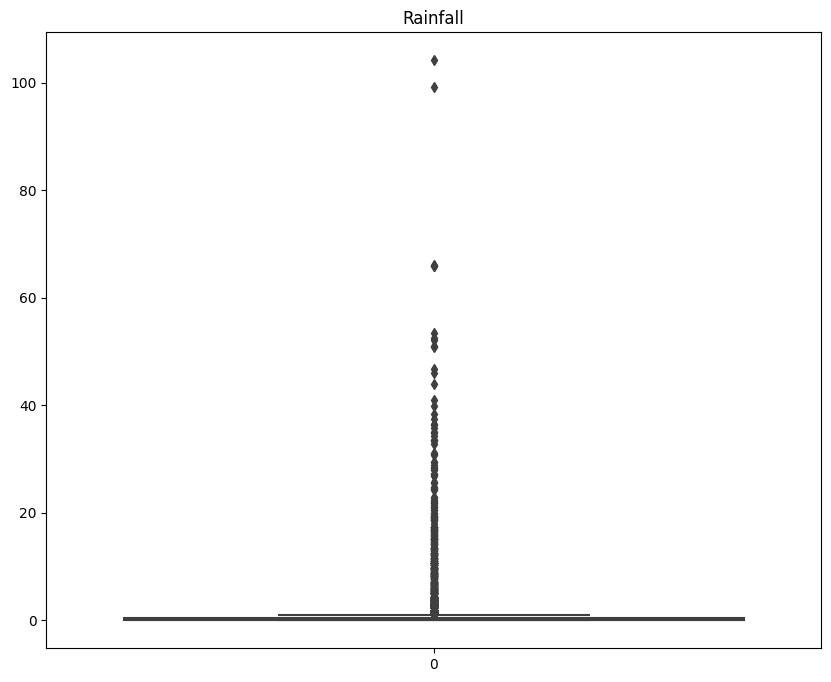

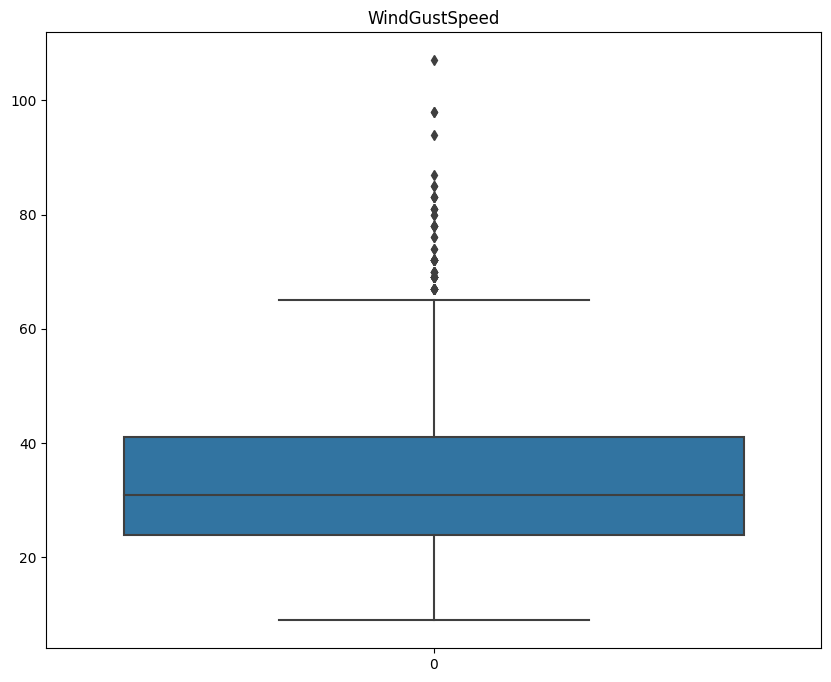

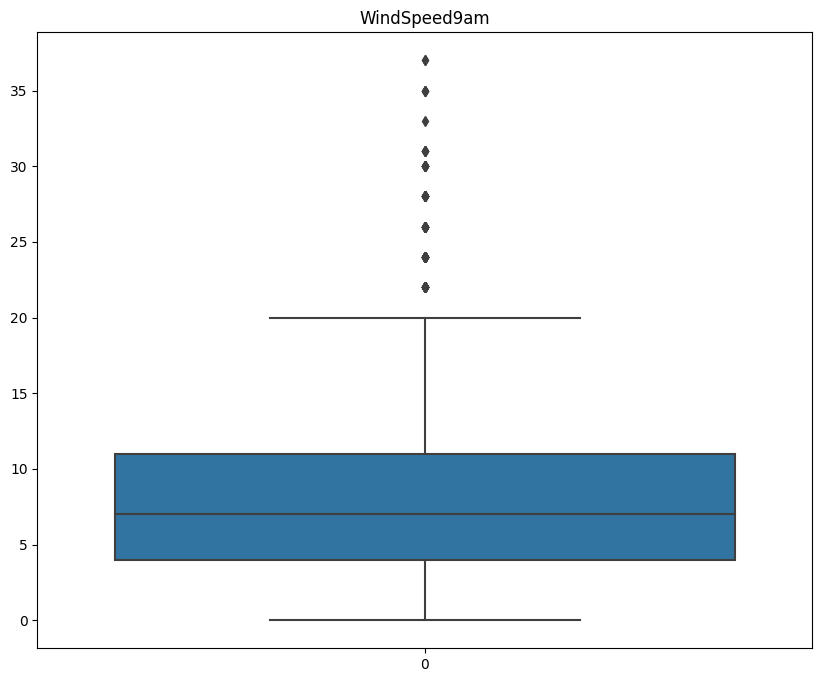

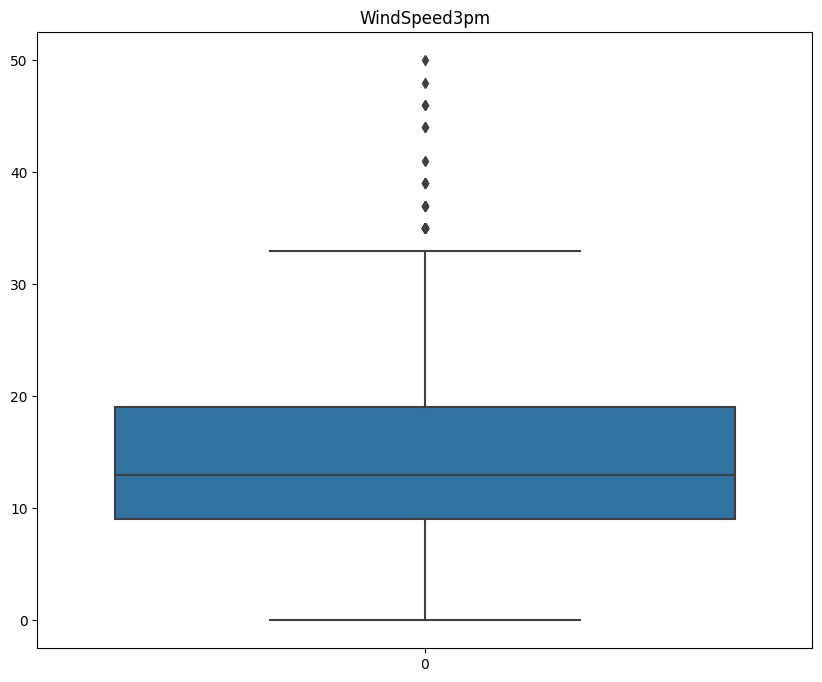

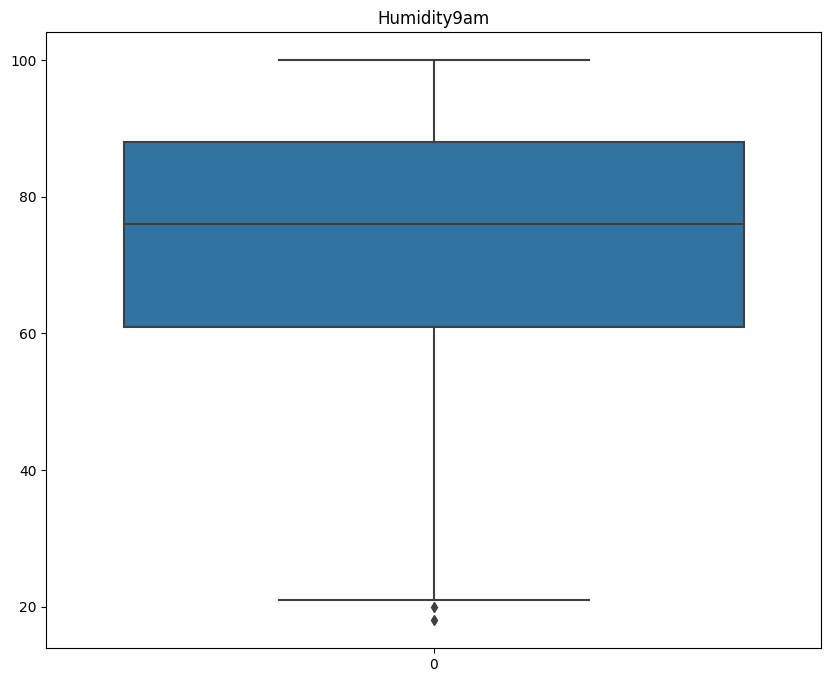

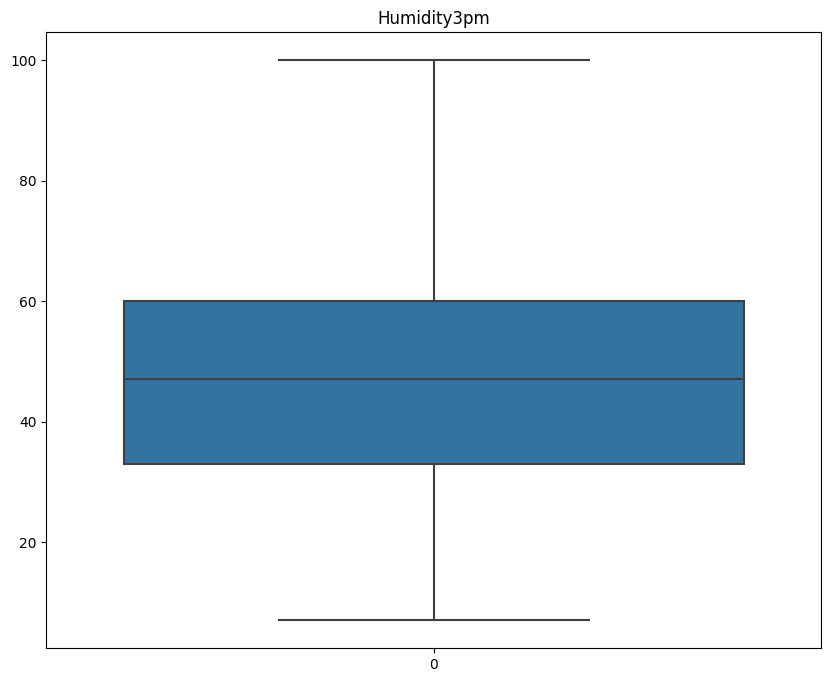

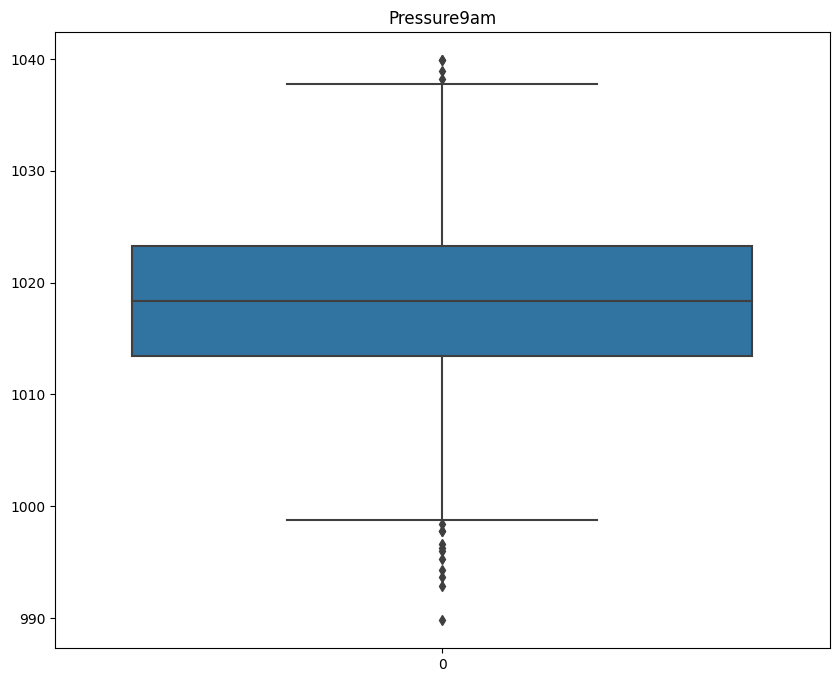

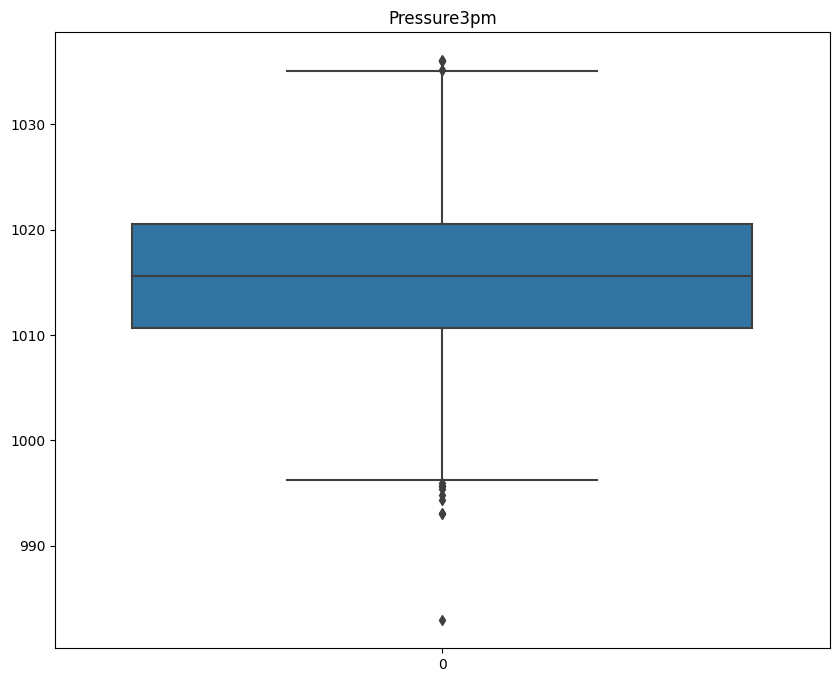

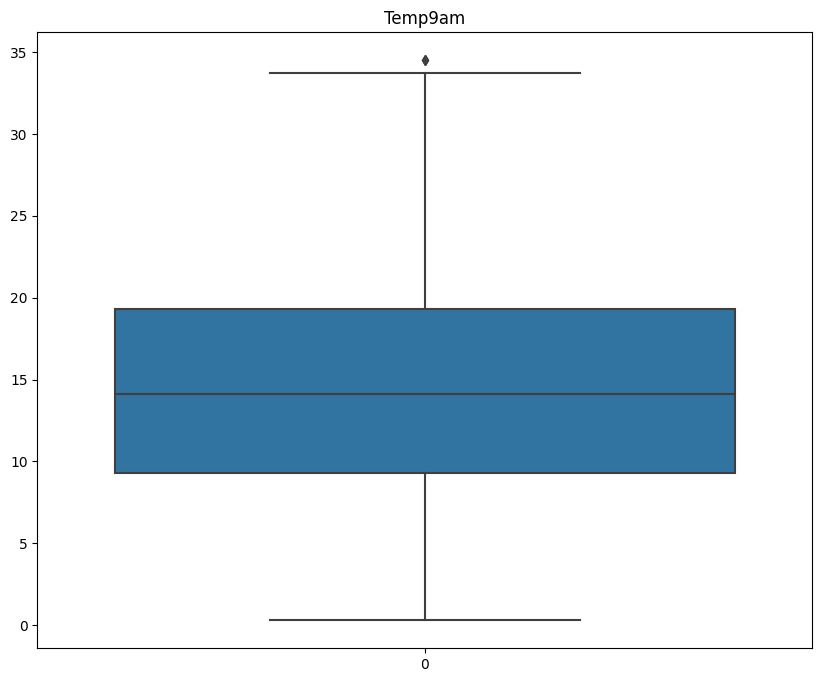

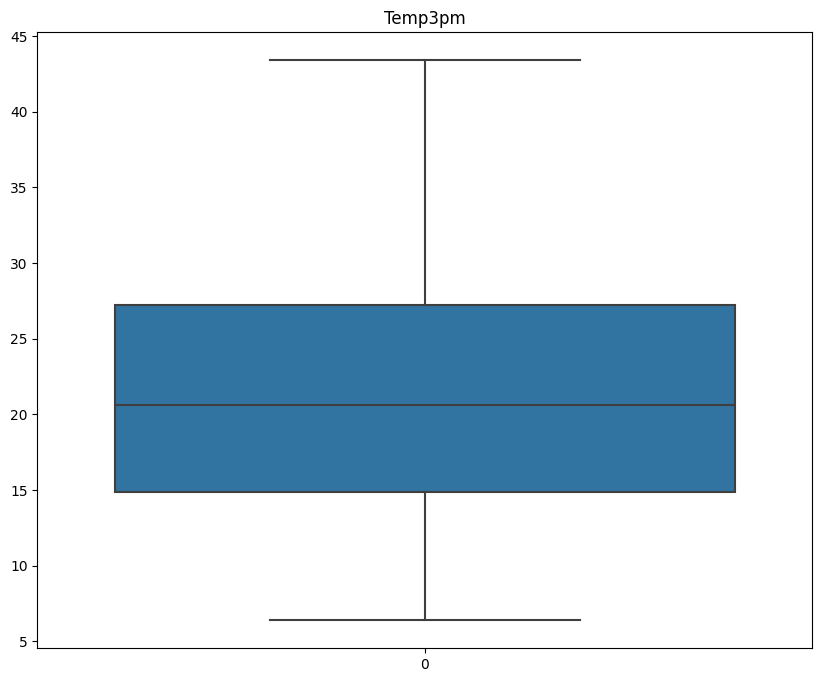

<Figure size 1000x800 with 0 Axes>

In [20]:
for column in numerical_columns:
    sns.boxplot(data_Albury[column])
    plt.title(column)
    plt.figure(figsize=(10,8))

In [21]:
IQR=data_Albury.Rainfall.quantile(0.75)-data_Albury.Rainfall.quantile(0.25)
low=data_Albury.Rainfall.quantile(0.25)-(IQR*1.5)
high=data_Albury.Rainfall.quantile(0.75)+(IQR*1.5)
print(low, high)

-0.6000000000000001 1.0


In [22]:
data_Albury.loc[data_Albury['Rainfall']>=1,'Rainfall']=1
data_Albury.loc[data_Albury['Rainfall']<=-0.6000000000000001,'Rainfall']=-0.6000000000000001

In [23]:
IQR=data_Albury.WindGustSpeed.quantile(0.75)-data_Albury.WindGustSpeed.quantile(0.25)
low=data_Albury.WindGustSpeed.quantile(0.25)-(IQR*1.5)
high=data_Albury.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(low, high)

-1.5 66.5


In [24]:
data_Albury.loc[data_Albury['WindGustSpeed']>=66.5,'WindGustSpeed']=66.5
data_Albury.loc[data_Albury['WindGustSpeed']<=-1.5,'WindGustSpeed']=-1.5

In [25]:
IQR=data_Albury.WindSpeed9am.quantile(0.75)-data_Albury.WindSpeed9am.quantile(0.25)
low=data_Albury.WindSpeed9am.quantile(0.25)-(IQR*1.5)
high=data_Albury.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(low, high)

-6.5 21.5


In [26]:
data_Albury.loc[data_Albury['WindSpeed9am']>=21.5,'WindSpeed9am']=21.5
data_Albury.loc[data_Albury['WindSpeed9am']<=-6.5,'WindSpeed9am']=-6.5

In [27]:
IQR=data_Albury.WindSpeed3pm.quantile(0.75)-data_Albury.WindSpeed3pm.quantile(0.25)
low=data_Albury.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
high=data_Albury.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(low, high)

-6.0 34.0


In [28]:
data_Albury.loc[data_Albury['WindSpeed3pm']>=34,'WindSpeed3pm']=34
data_Albury.loc[data_Albury['WindSpeed3pm']<=-6,'WindSpeed3pm']=-6

In [29]:
IQR=data_Albury.Humidity9am.quantile(0.75)-data_Albury.Humidity9am.quantile(0.25)
low=data_Albury.Humidity9am.quantile(0.25)-(IQR*1.5)
high=data_Albury.Humidity9am.quantile(0.75)+(IQR*1.5)
print(low, high)

20.5 128.5


In [30]:
data_Albury.loc[data_Albury['Humidity9am']>=128.5,'Humidity9am']=128.5
data_Albury.loc[data_Albury['Humidity9am']<=20.5,'Humidity9am']=20.5

In [31]:
IQR=data_Albury.Pressure9am.quantile(0.75)-data_Albury.Pressure9am.quantile(0.25)
low=data_Albury.Pressure9am.quantile(0.25)-(IQR*1.5)
high=data_Albury.Pressure9am.quantile(0.75)+(IQR*1.5)
print(low, high)

998.55 1038.1499999999999


In [32]:
data_Albury.loc[data_Albury['Pressure9am']>=1038.1499999999999,'Pressure9am']=1038.1499999999999
data_Albury.loc[data_Albury['Pressure9am']<=998.55,'Pressure9am']=998.55

In [33]:
IQR=data_Albury.Pressure3pm.quantile(0.75)-data_Albury.Pressure3pm.quantile(0.25)
low=data_Albury.Pressure3pm.quantile(0.25)-(IQR*1.5)
high=data_Albury.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(low, high)

996.0000000000001 1035.1999999999998


In [34]:
data_Albury.loc[data_Albury['Pressure3pm']>=1035.1999999999998,'Pressure3pm']=1035.1999999999998
data_Albury.loc[data_Albury['Pressure3pm']<=996.0000000000001,'Pressure3pm']=996.0000000000001

In [35]:
IQR=data_Albury.Temp9am.quantile(0.75)-data_Albury.Temp9am.quantile(0.25)
low=data_Albury.Temp9am.quantile(0.25)-(IQR*1.5)
high=data_Albury.Temp9am.quantile(0.75)+(IQR*1.5)
print(low, high)

-5.699999999999999 34.3


In [36]:
data_Albury.loc[data_Albury['Temp9am']>=34.3,'Temp9am']=34.3
data_Albury.loc[data_Albury['Temp9am']<=-5.699999999999999 ,'Temp9am']=-5.699999999999999 

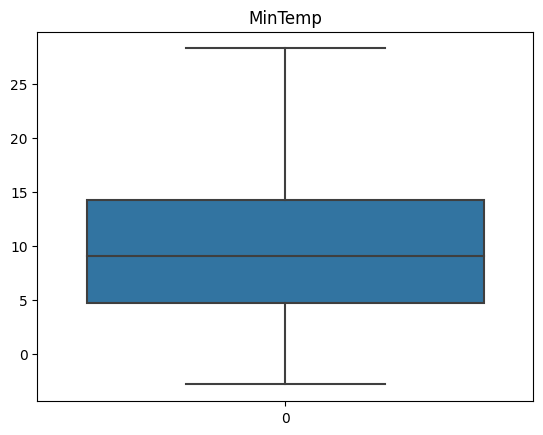

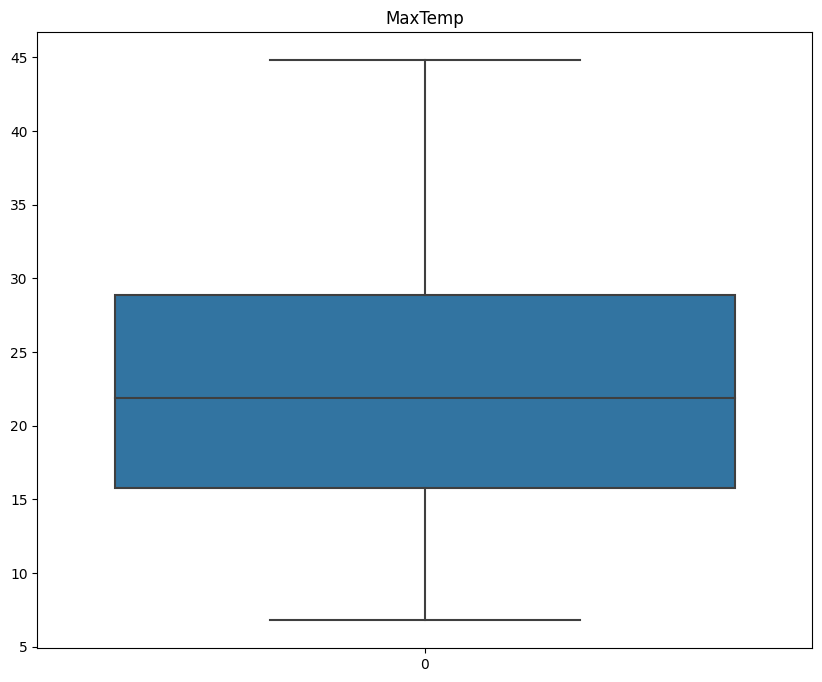

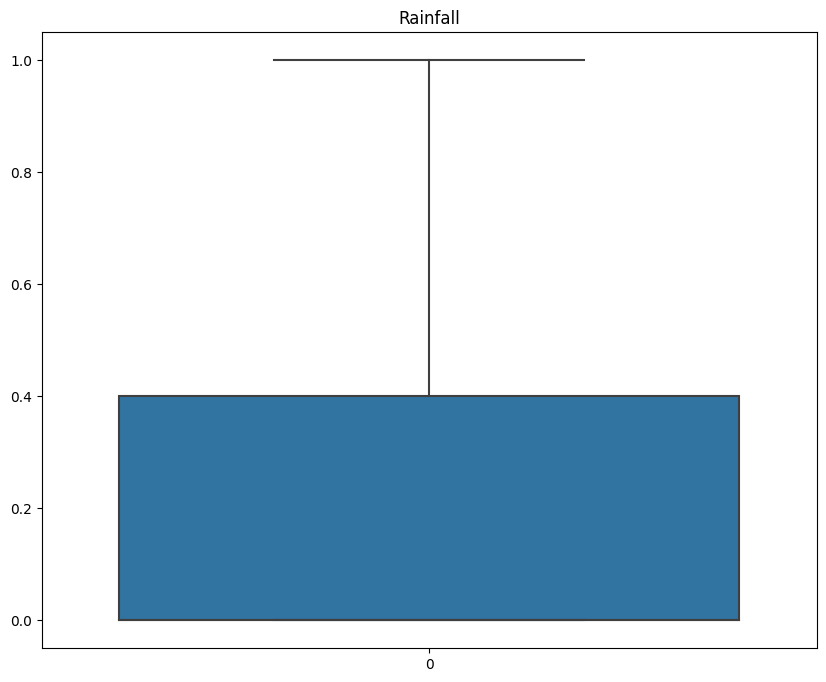

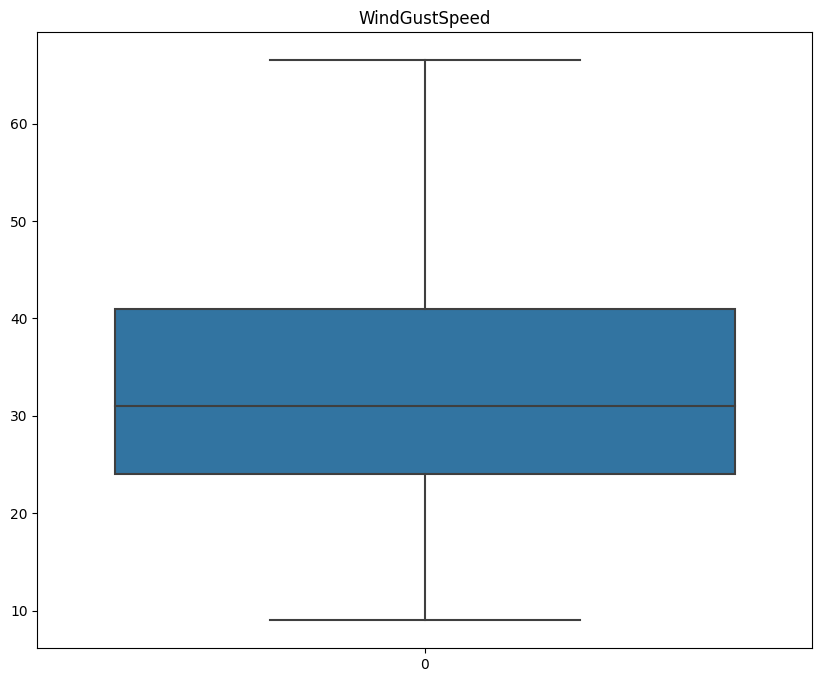

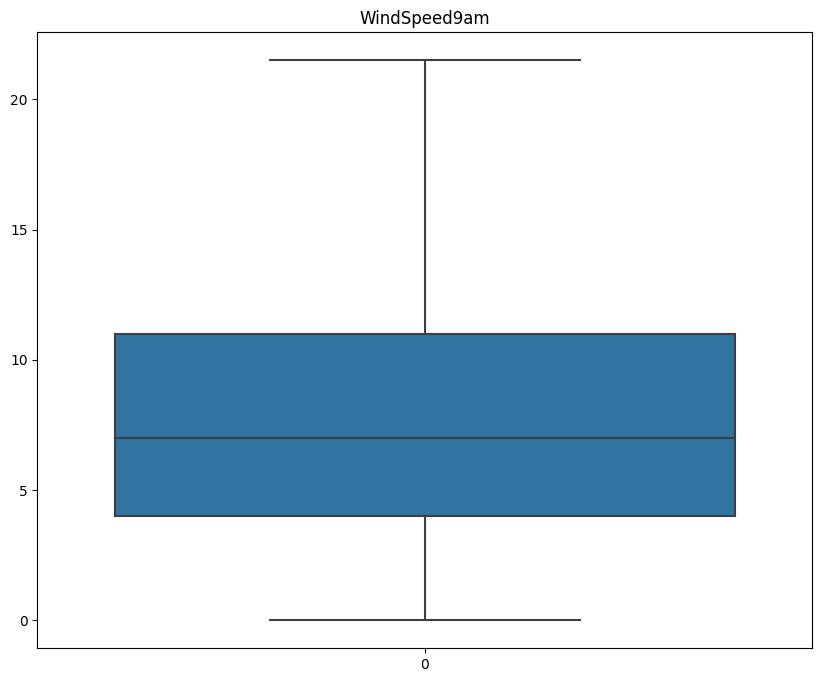

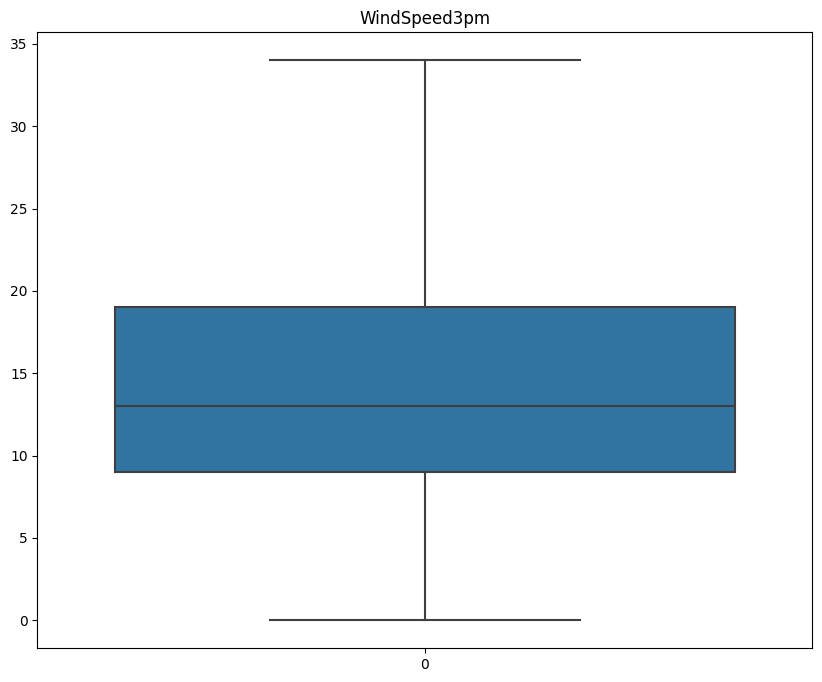

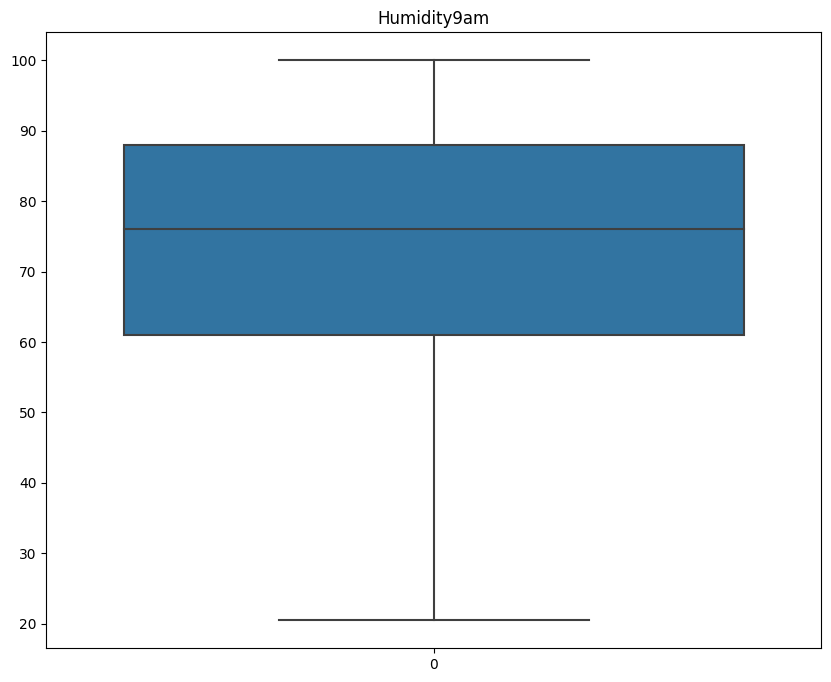

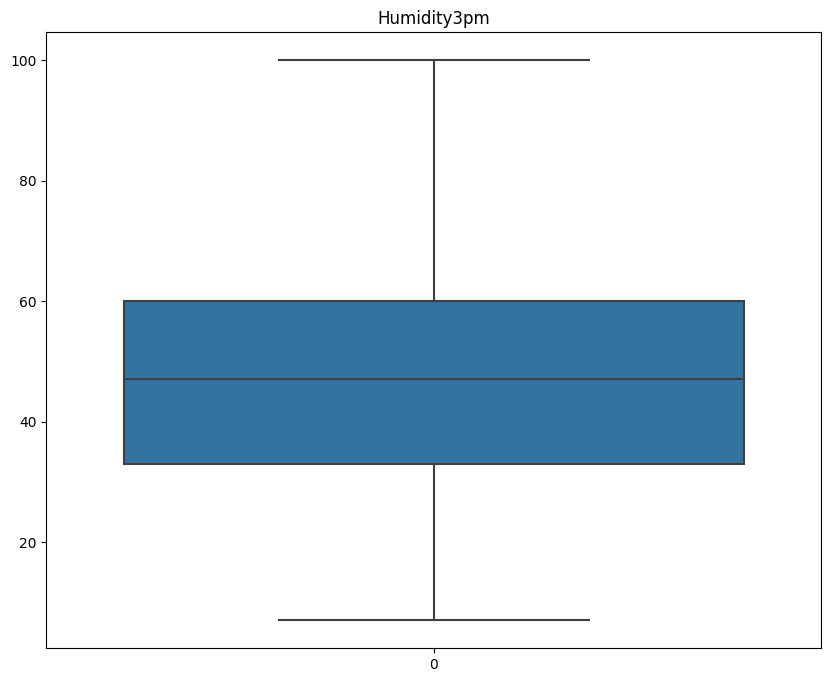

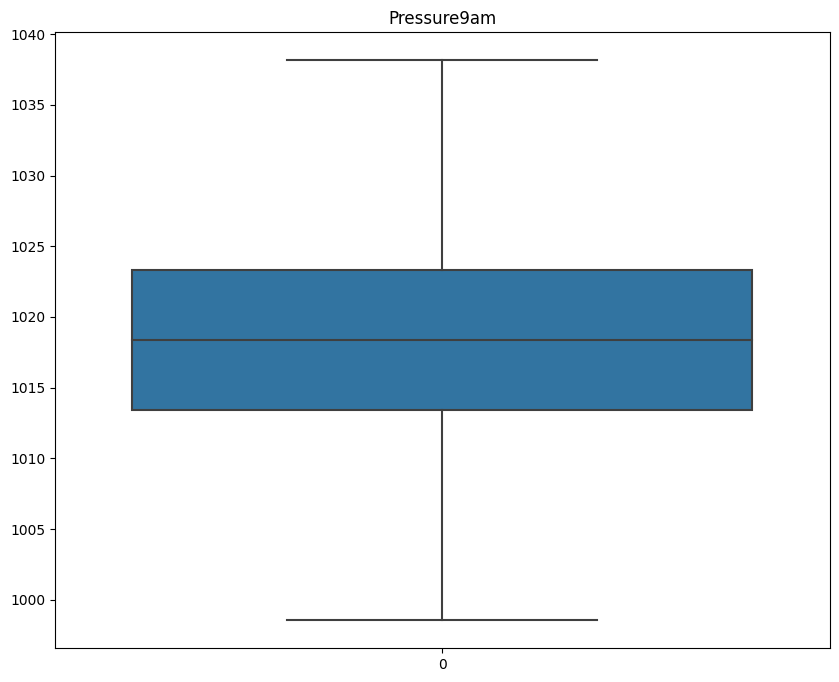

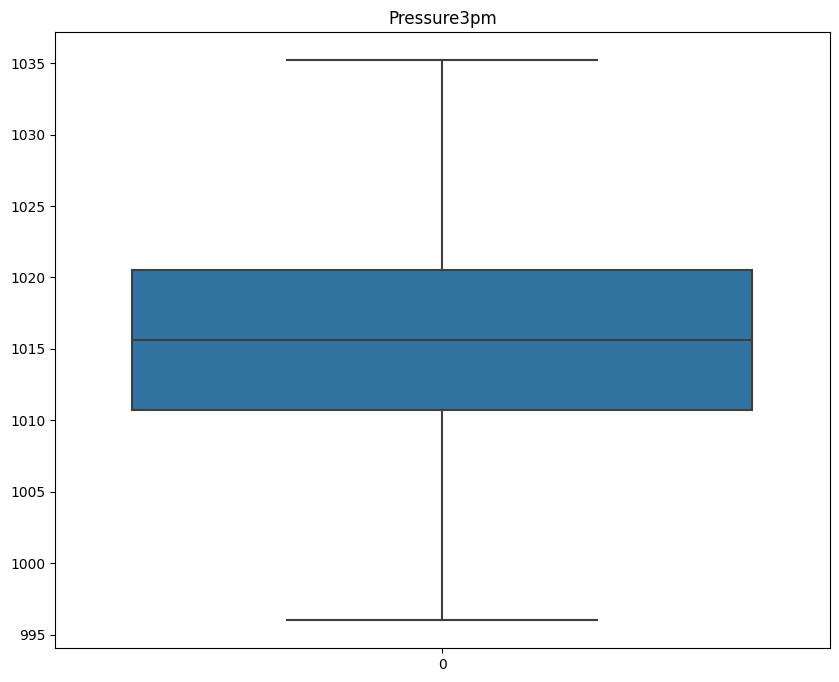

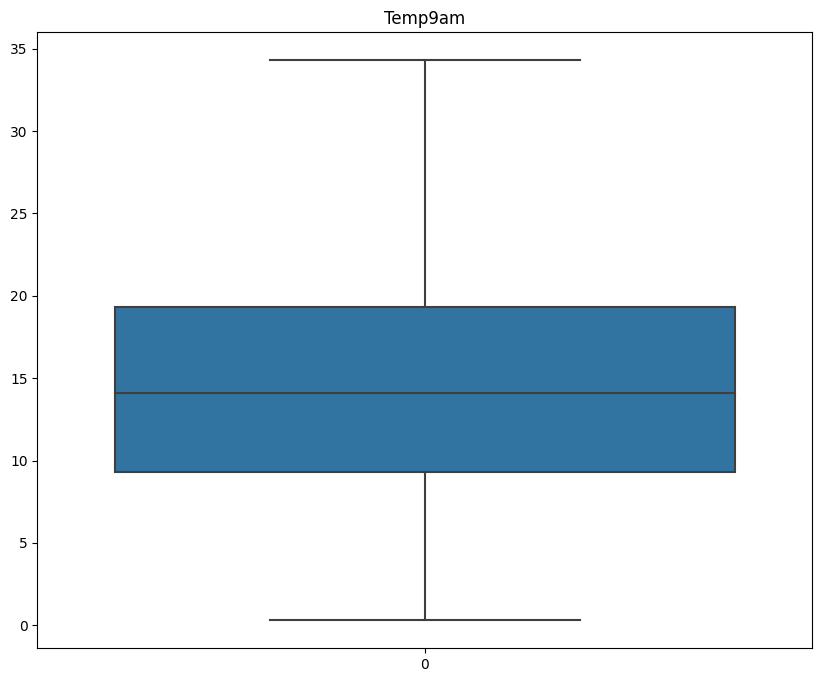

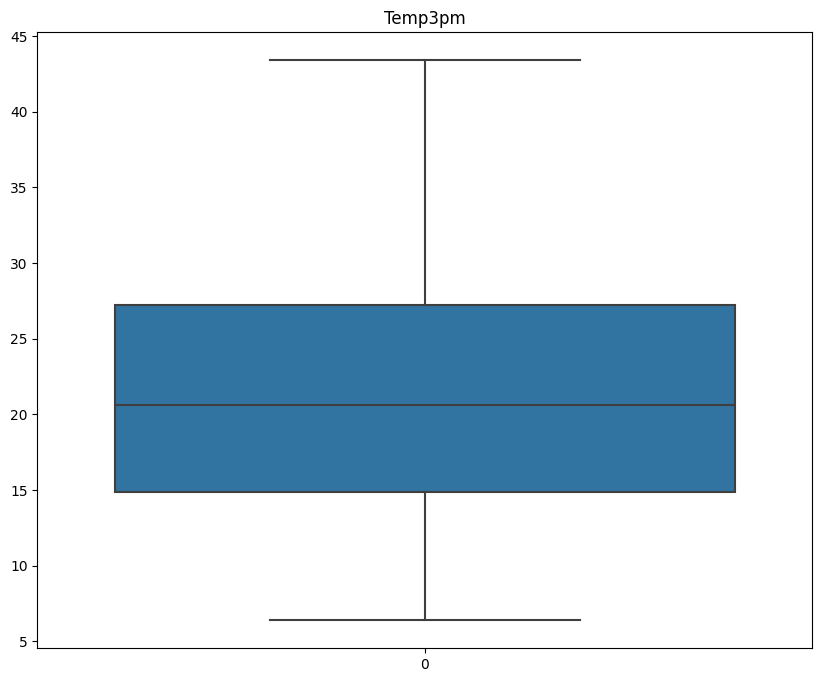

<Figure size 1000x800 with 0 Axes>

In [37]:
for column in numerical_columns:
    sns.boxplot(data_Albury[column])
    plt.title(column)
    plt.figure(figsize=(10,8))

<Axes: >

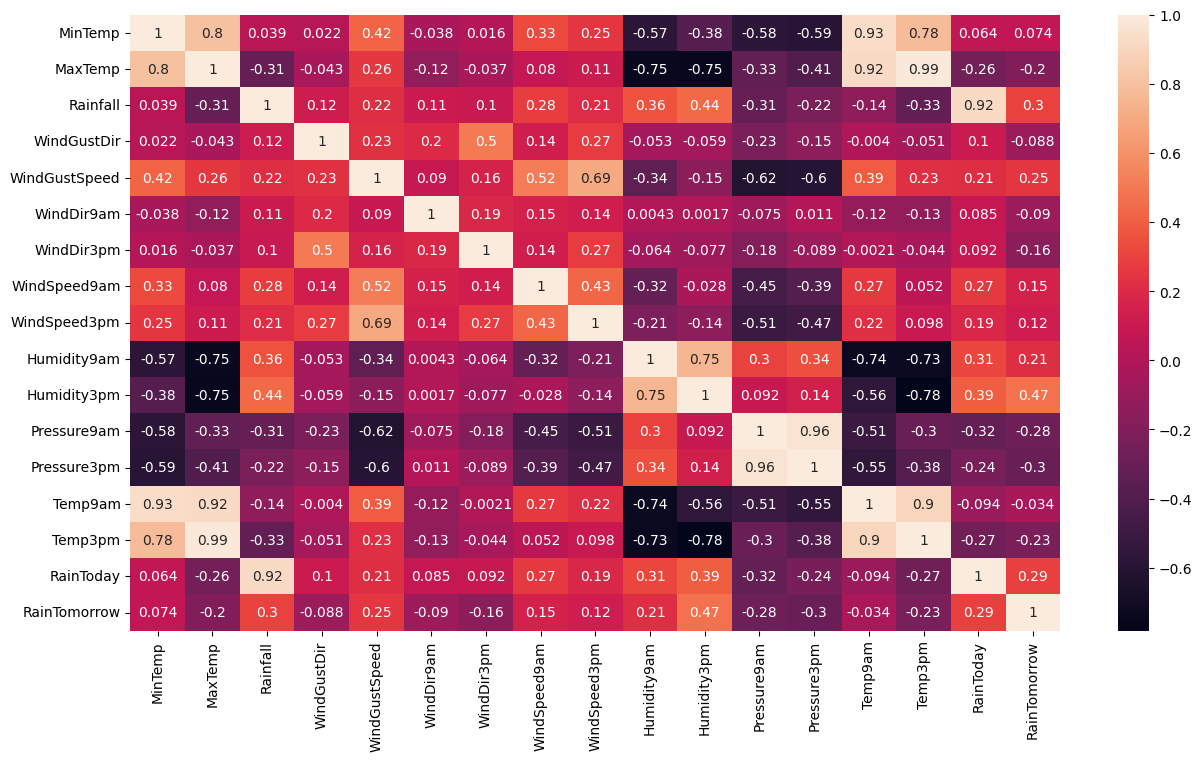

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(data_Albury.corr(numeric_only=True),annot=True)

In [39]:
data_Albury.to_csv("processed_data.csv")

<Axes: xlabel='Rainfall', ylabel='RainToday'>

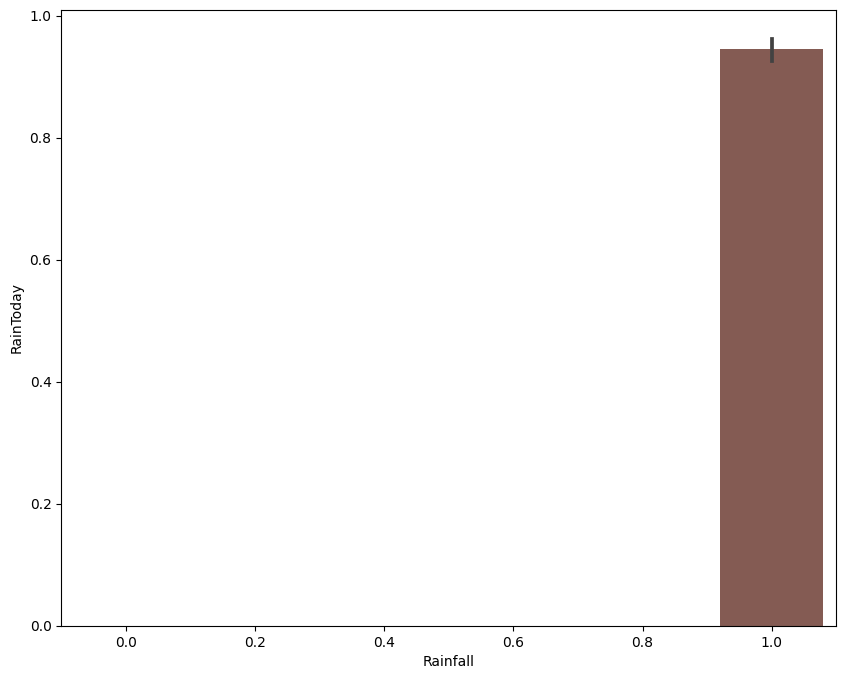

In [40]:
plt.figure(figsize=(10,8))
sns.barplot(x=data_Albury['Rainfall'],y=data_Albury['RainToday'])

<Axes: xlabel='Humidity3pm', ylabel='RainToday'>

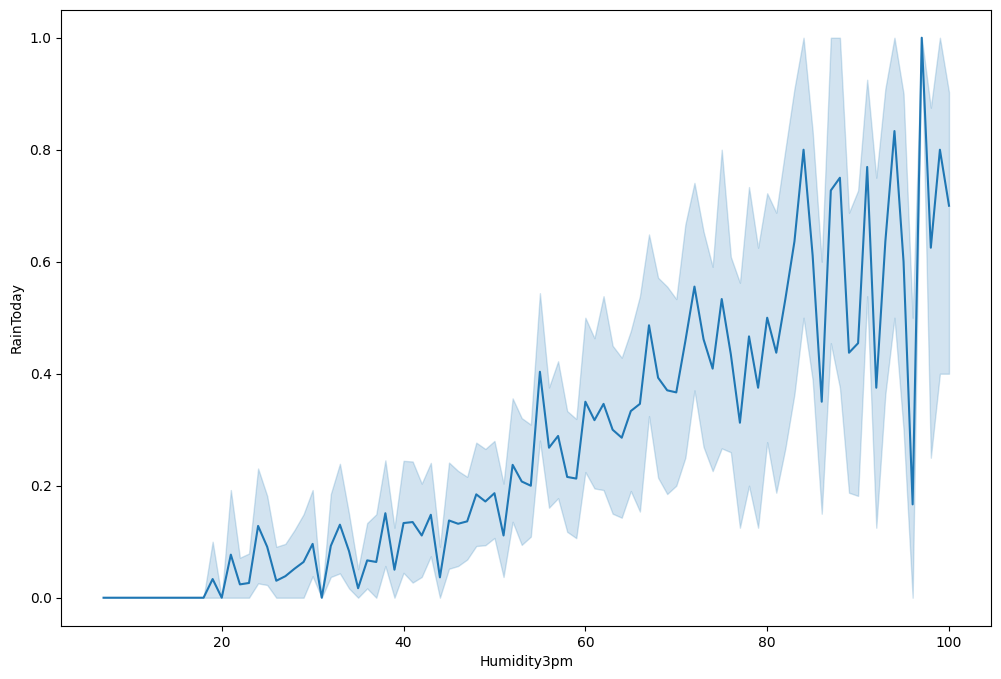

In [41]:
plt.figure(figsize=(12,8))
sns.lineplot(x=data_Albury['Humidity3pm'],y=data_Albury['RainToday'])

<Axes: xlabel='MaxTemp', ylabel='RainToday'>

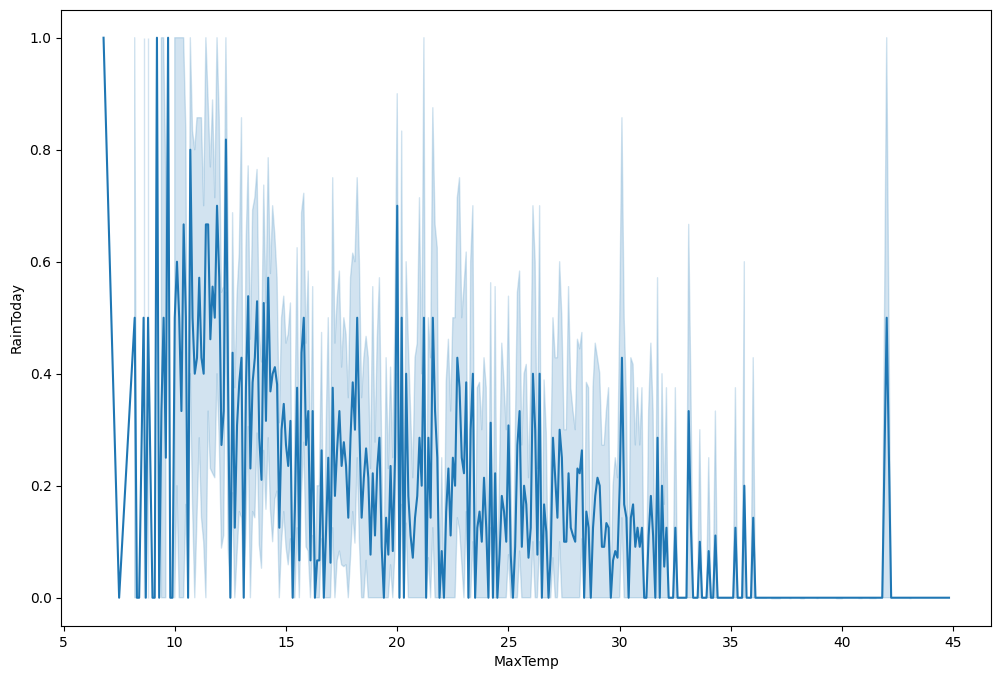

In [42]:
plt.figure(figsize=(12,8))
sns.lineplot(x=data_Albury['MaxTemp'],y=data_Albury['RainToday'])

In [43]:
data_Albury.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<Axes: xlabel='WindGustDir', ylabel='RainToday'>

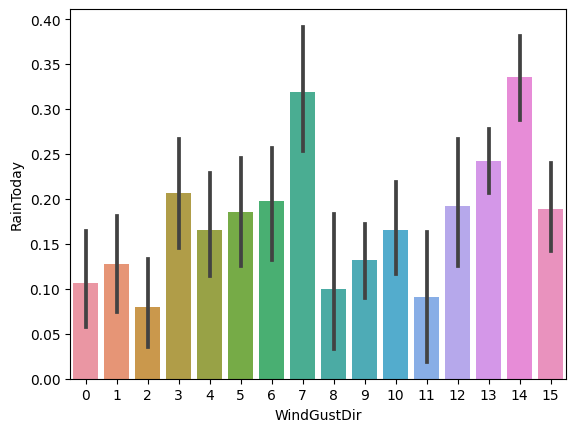

In [44]:
sns.barplot(x=data_Albury['WindGustDir'],y=data_Albury['RainToday'])

<Axes: xlabel='Temp9am', ylabel='Temp3pm'>

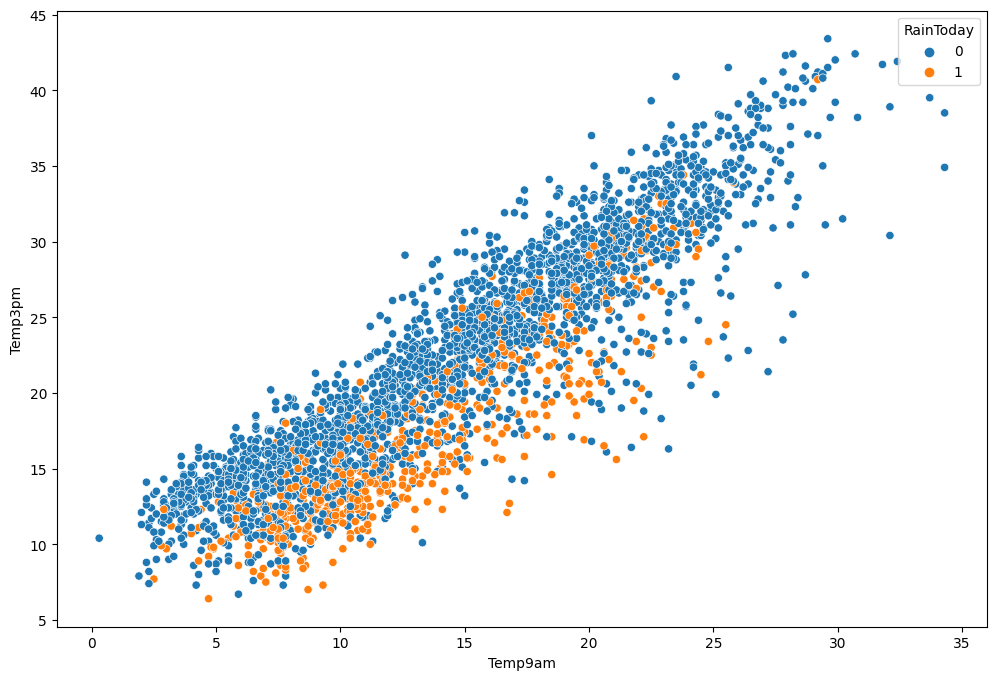

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_Albury['Temp9am'],y=data_Albury['Temp3pm'],hue=data_Albury['RainToday'])

<Axes: xlabel='Humidity9am', ylabel='Humidity3pm'>

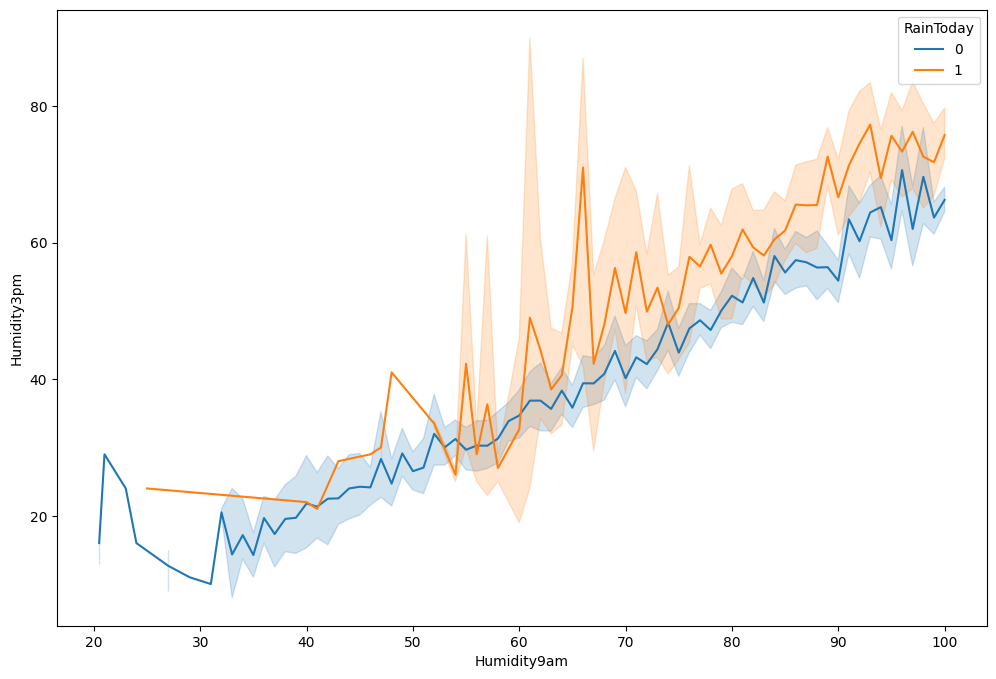

In [46]:
plt.figure(figsize=(12,8))
sns.lineplot(x=data_Albury['Humidity9am'],y=data_Albury['Humidity3pm'],hue=data_Albury['RainToday'])

<Axes: xlabel='Pressure9am', ylabel='Pressure3pm'>

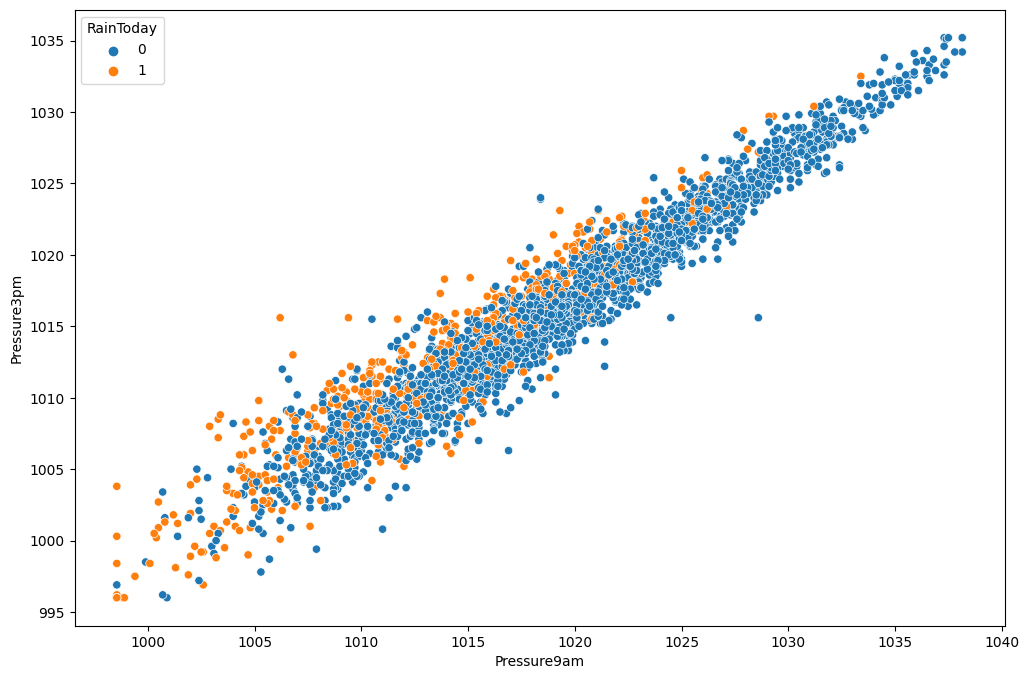

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_Albury['Pressure9am'],y=data_Albury['Pressure3pm'],hue=data_Albury['RainToday'])

<Axes: xlabel='Temp9am', ylabel='Temp3pm'>

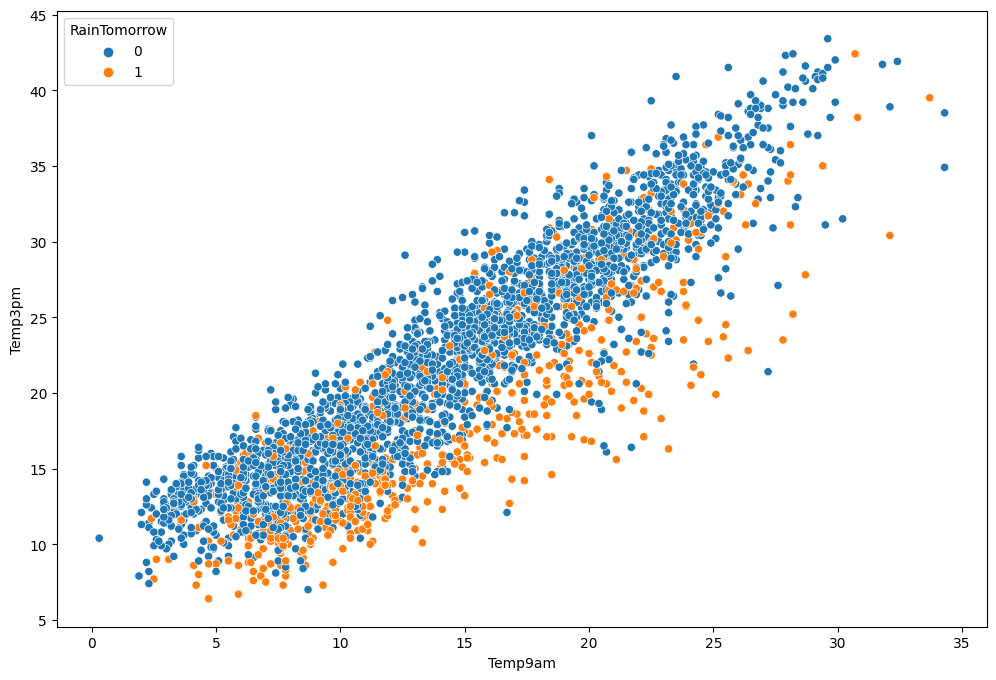

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_Albury['Temp9am'],y=data_Albury['Temp3pm'],hue=data_Albury['RainTomorrow'])

<Axes: xlabel='Humidity9am', ylabel='Humidity3pm'>

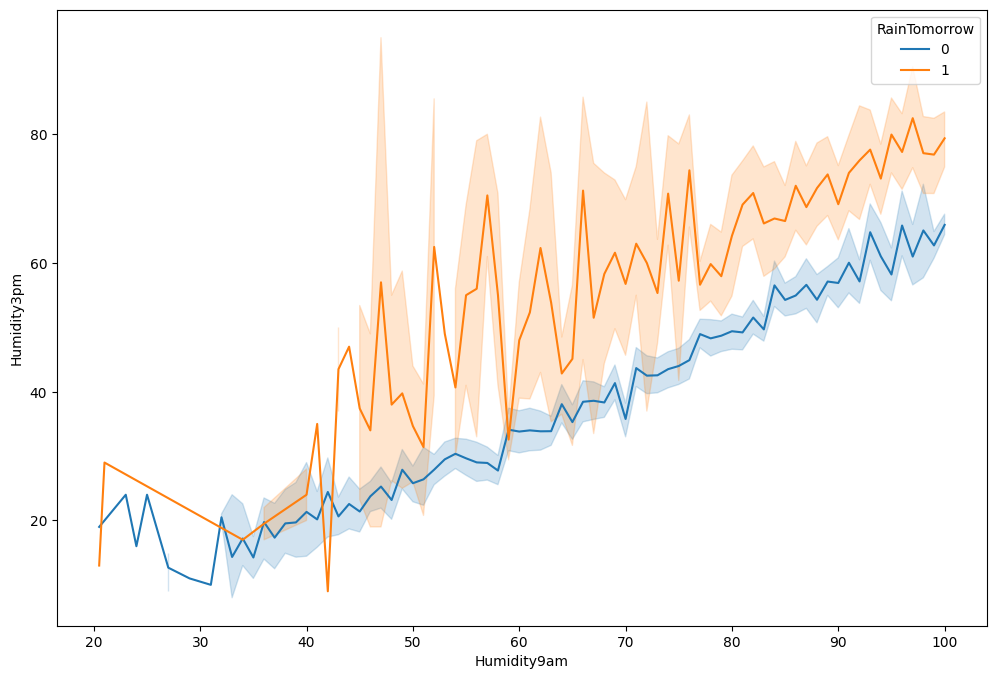

In [49]:
plt.figure(figsize=(12,8))
sns.lineplot(x=data_Albury['Humidity9am'],y=data_Albury['Humidity3pm'],hue=data_Albury['RainTomorrow'])

<Axes: xlabel='Pressure9am', ylabel='Pressure3pm'>

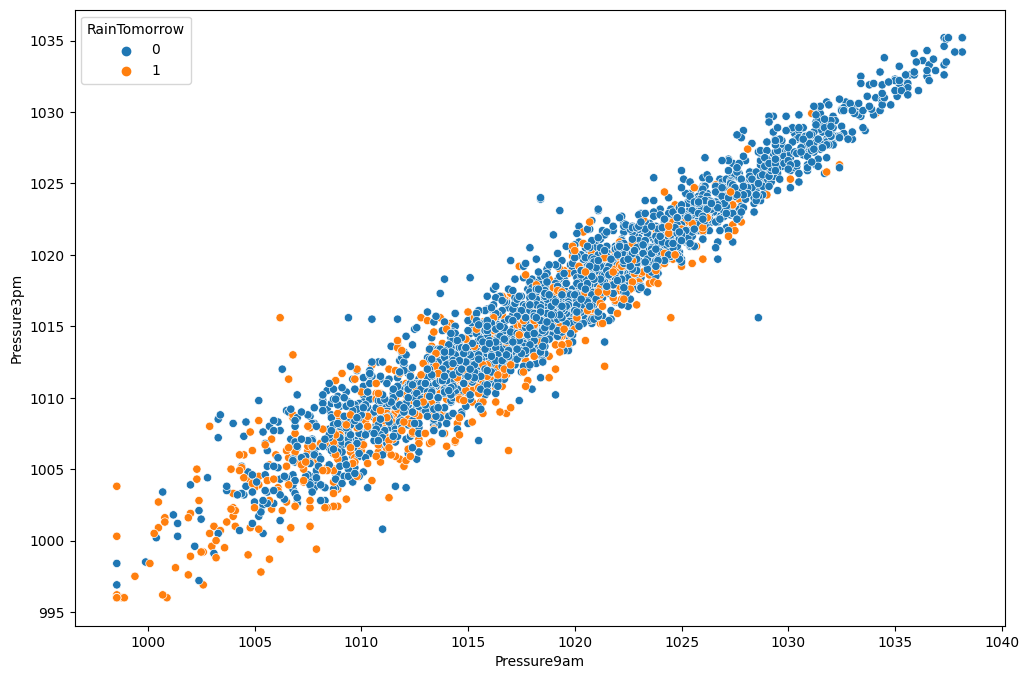

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_Albury['Pressure9am'],y=data_Albury['Pressure3pm'],hue=data_Albury['RainTomorrow'])

In [51]:
data_Albury['Date']=pd.to_datetime(data_Albury['Date'])
data_Albury.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 0 to 3039
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3040 non-null   datetime64[ns]
 1   Location       3040 non-null   object        
 2   MinTemp        3040 non-null   float64       
 3   MaxTemp        3040 non-null   float64       
 4   Rainfall       3040 non-null   float64       
 5   WindGustDir    3040 non-null   int32         
 6   WindGustSpeed  3040 non-null   float64       
 7   WindDir9am     3040 non-null   int32         
 8   WindDir3pm     3040 non-null   int32         
 9   WindSpeed9am   3040 non-null   float64       
 10  WindSpeed3pm   3040 non-null   float64       
 11  Humidity9am    3040 non-null   float64       
 12  Humidity3pm    3040 non-null   float64       
 13  Pressure9am    3040 non-null   float64       
 14  Pressure3pm    3040 non-null   float64       
 15  Temp9am        3040 non-nu

In [52]:
data_Albury['Year-Mon'] = [x.strftime("%Y-%m") for x in data_Albury['Date']]
data_Albury['Year-Mon']

0       2008-12
1       2008-12
2       2008-12
3       2008-12
4       2008-12
         ...   
3035    2017-06
3036    2017-06
3037    2017-06
3038    2017-06
3039    2017-06
Name: Year-Mon, Length: 3040, dtype: object

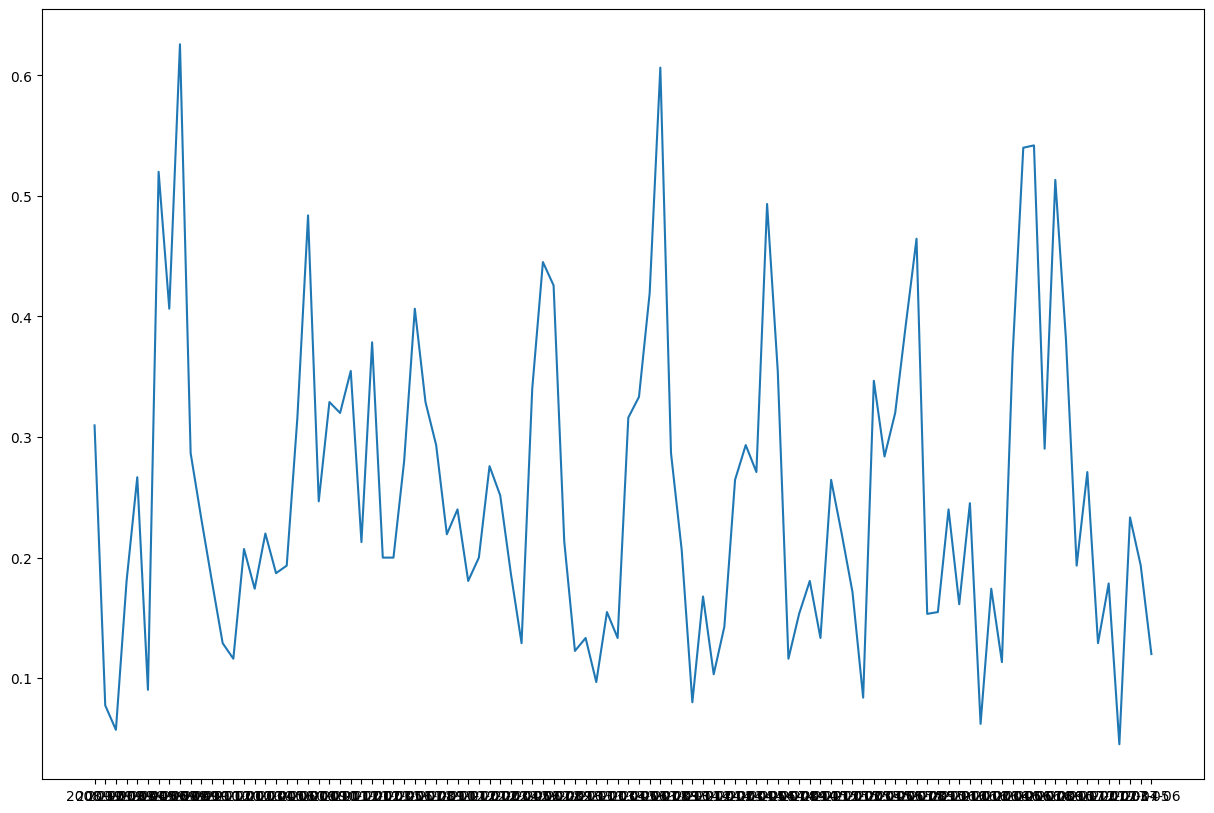

In [53]:
rainfall=data_Albury.groupby(['Year-Mon'])['Rainfall'].mean()
plt.figure(figsize=(15,10))
plt.plot(rainfall)
plt.show()

In [54]:
data_Albury.set_index('Date', inplace=True)

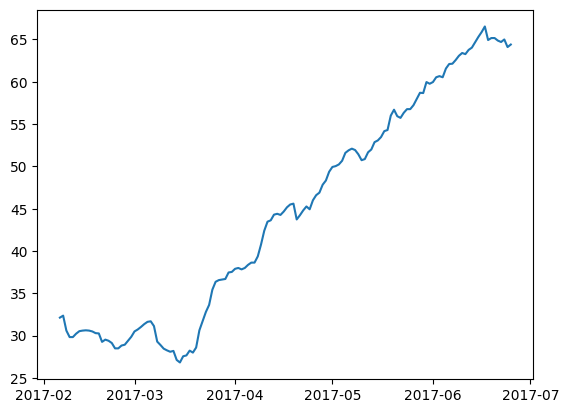

In [55]:
rollmean_rainfall=data_Albury['Humidity3pm'].rolling(30).mean()
plt.plot(rollmean_rainfall.iloc[2900:3040])

In [56]:
from statsmodels.tsa.stattools import adfuller
adfuller(data_Albury['Humidity3pm'])

(-3.66541911475149,
 0.004626711443434523,
 22,
 3017,
 {'1%': -3.4325193312999036,
  '5%': -2.8624984712561274,
  '10%': -2.567280219110819},
 24290.35311751815)

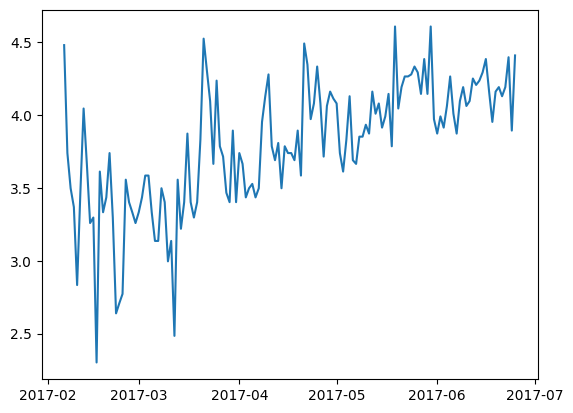

In [57]:
log_data=np.log(data_Albury['Humidity3pm'])
plt.plot(log_data.iloc[2900:3040])

In [58]:
data_Albury['difference']=data_Albury['Humidity3pm']-data_Albury['Humidity3pm'].shift(5)

In [59]:
data1=data_Albury['difference'].iloc[6:3040]

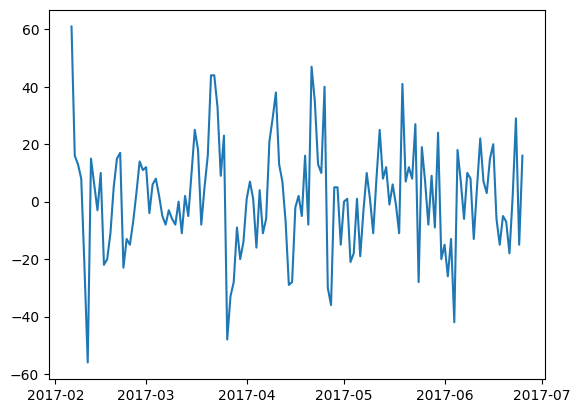

In [60]:
plt.plot(data_Albury['difference'].iloc[2900:3040])

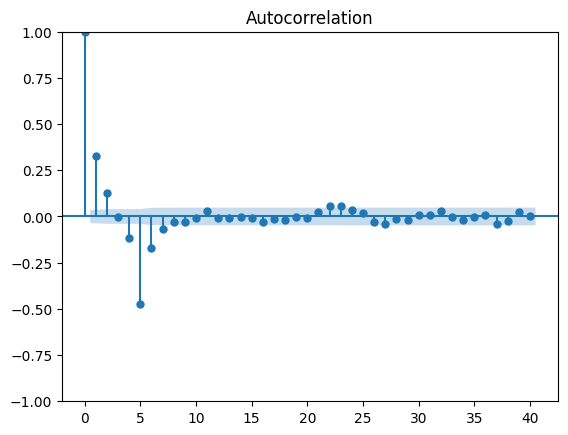

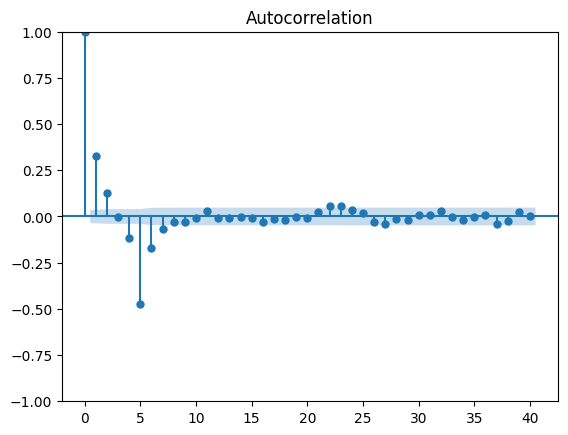

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data1, lags=40)

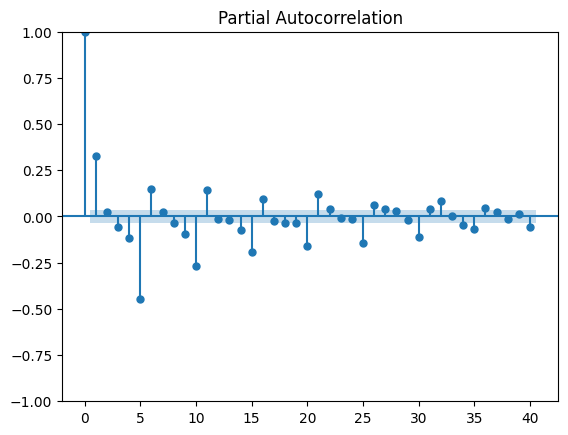

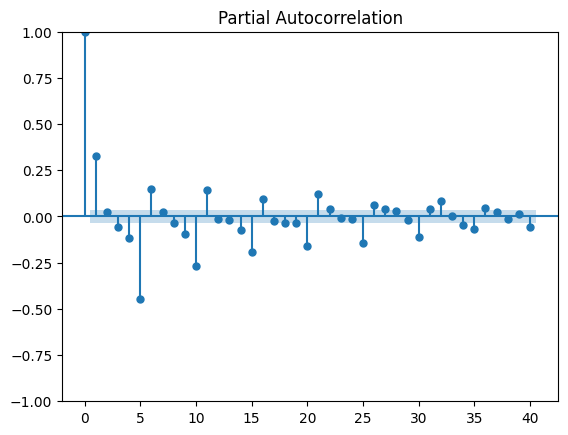

In [62]:
plot_pacf(data1, lags=40)

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_Albury['Humidity3pm'], period=12)  

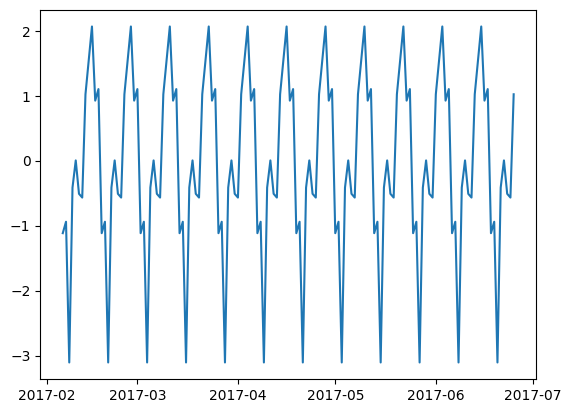

In [64]:
seasonal=decomposition.seasonal
plt.plot(seasonal.iloc[2900:3040])

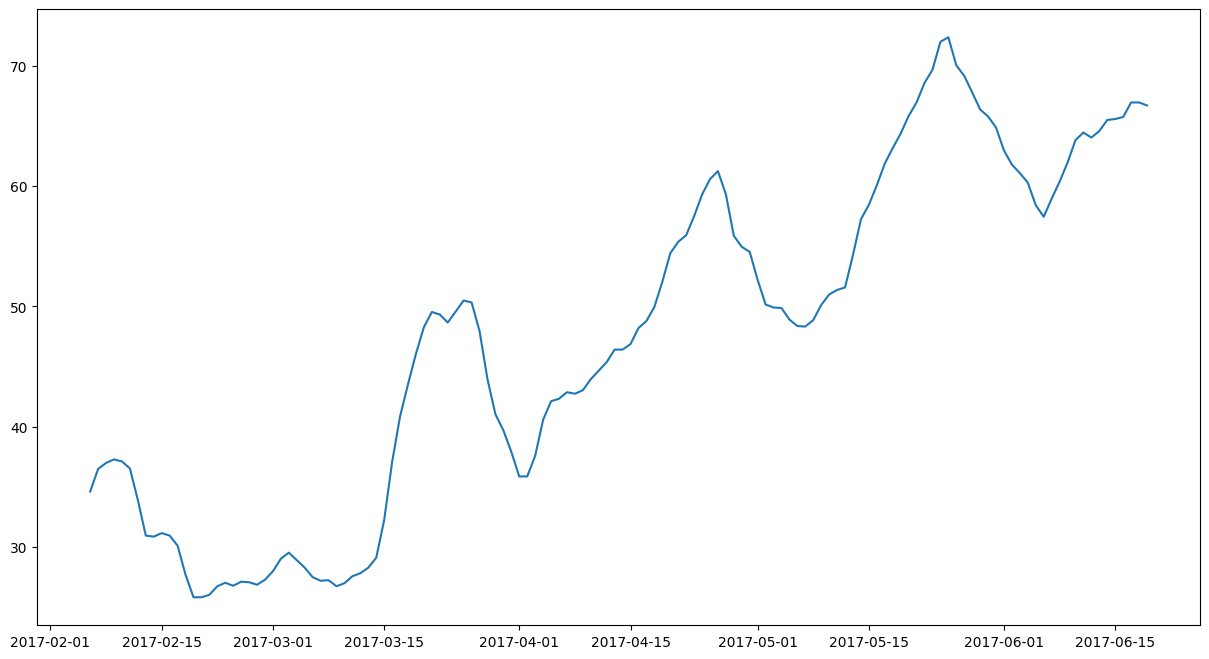

In [65]:
trend=decomposition.trend
plt.figure(figsize=(15,8))
plt.plot(trend.iloc[2900:3040])

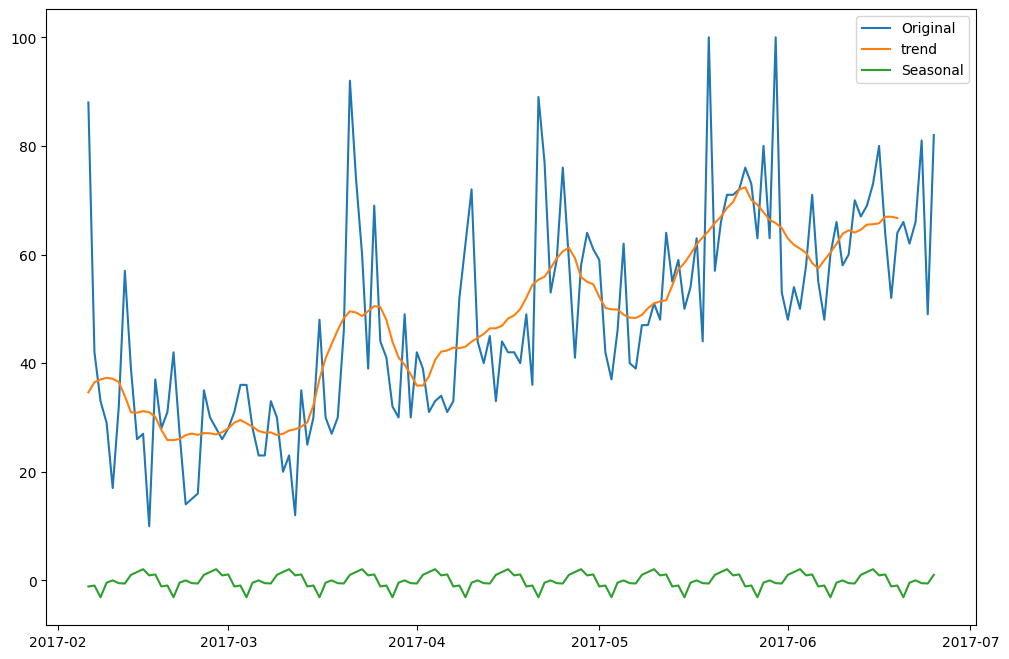

In [66]:
plt.figure(figsize=(12,8))
plt.plot(data_Albury['Humidity3pm'].iloc[2900:3040],label='Original')
plt.plot(trend.iloc[2900:3040],label='trend')
plt.plot(seasonal.iloc[2900:3040],label='Seasonal')
plt.legend()

In [67]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(data1)
lag_pacf=pacf(data1)

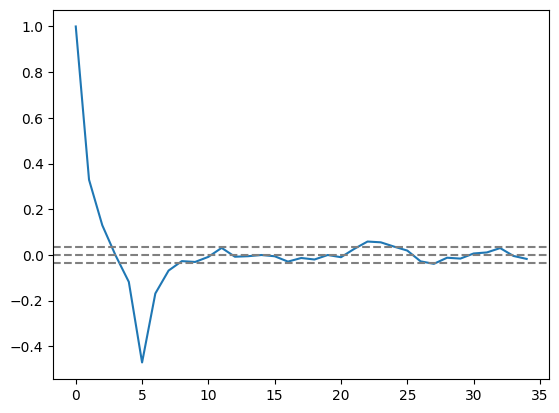

In [68]:
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data1)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data1)), linestyle='--',color='gray')

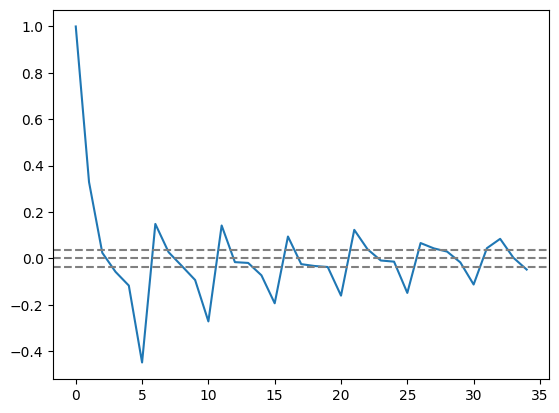

In [69]:
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data1)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data1)), linestyle='--',color='gray')

In [70]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data_Albury['Humidity3pm'],order=(1,1,2))
model=model.fit()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

In [71]:
data_Albury['forecast']=model.predict(start=2970,end=3040,dynamic=True)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [72]:
data_Albury['forecast']=model.predict()

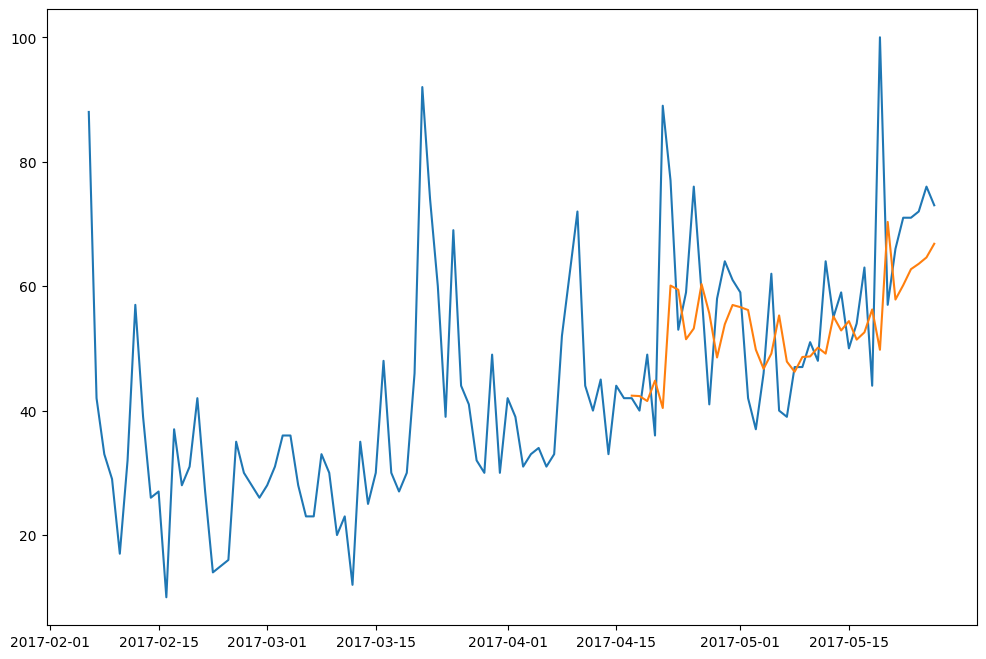

In [73]:
plt.figure(figsize=(12,8))
plt.plot(data_Albury['Humidity3pm'].iloc[2900:3010])
plt.plot(data_Albury['forecast'].iloc[2970:3010])

In [74]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(data_Albury['Humidity3pm'],order=(1,1,2),seasonal_order=(1,0,1,12))
model1=model1.fit()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [75]:
data_Albury['forecast1']=model1.predict(start=2970, end=3010, dynamic=True)
data_Albury['forecast1']=model1.predict().iloc[2970:3010]

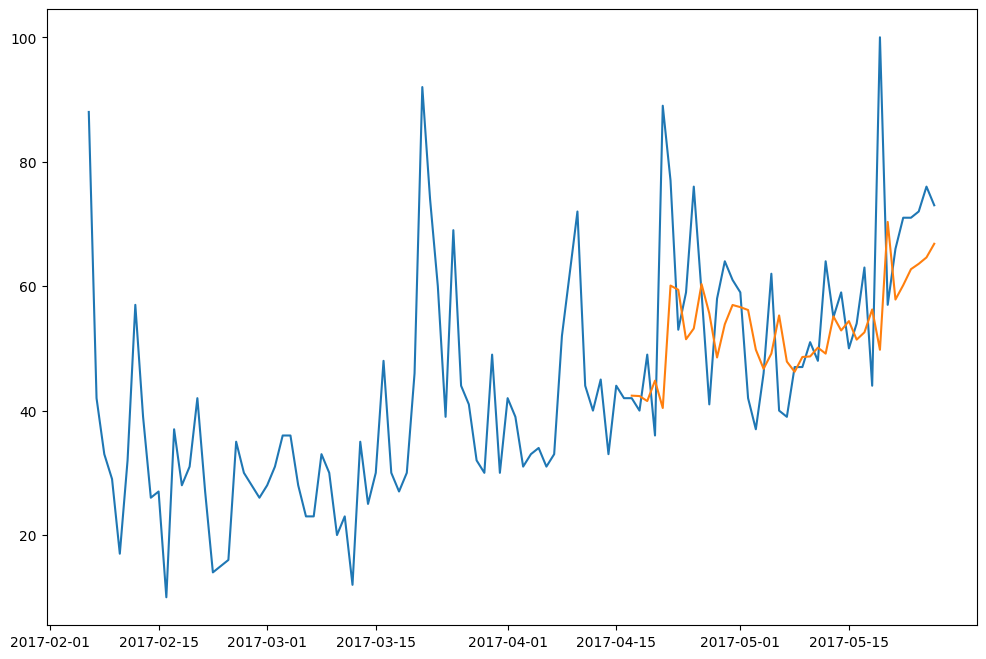

In [76]:
plt.figure(figsize=(12,8))
plt.plot(data_Albury['Humidity3pm'].iloc[2900:3010])
plt.plot(data_Albury['forecast'].iloc[2970:3010])

In [77]:
from pandas.tseries.offsets import DateOffset
future_dates=pd.date_range(start='2017-06-26', end='2017-07-26')

In [78]:
future_dates=pd.DataFrame(index=future_dates,columns=data_Albury.columns)

In [79]:
data_Albury=pd.concat([data_Albury,future_dates])

In [80]:
data_Albury

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year-Mon,difference,forecast,forecast1
2008-12-01,Albury,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,1007.7,1007.1,16.9,21.8,0,0,2008-12,NaN,0.000000,NaN
2008-12-02,Albury,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,1010.6,1007.8,17.2,24.3,0,0,2008-12,NaN,21.997884,NaN
2008-12-03,Albury,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,1007.6,1008.7,21.0,23.2,0,0,2008-12,NaN,23.916142,NaN
2008-12-04,Albury,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,1017.6,1012.8,18.1,26.5,0,0,2008-12,NaN,27.030450,NaN
2008-12-05,Albury,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,1010.8,1006.0,17.8,29.7,0,0,2008-12,NaN,20.712691,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
data_Albury['forecast1']=model1.predict(start=3010, end=3040, dynamic=True)
data_Albury['forecast1']=model1.predict(start=3010,end=3040)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return g

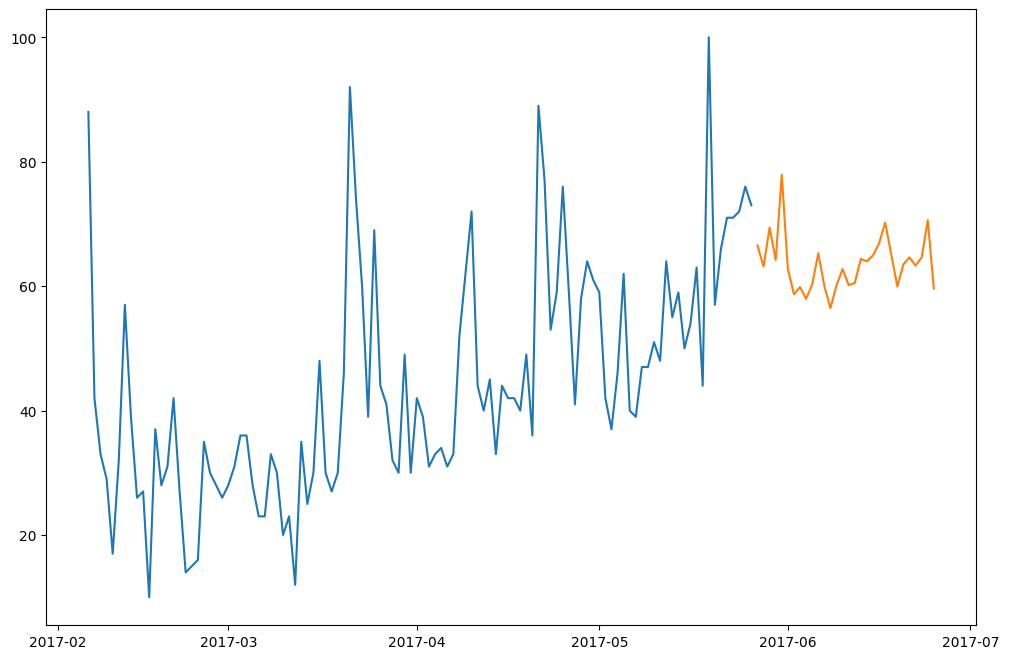

In [82]:
plt.figure(figsize=(12,8))
plt.plot(data_Albury['Humidity3pm'].iloc[2900:3010])
plt.plot(data_Albury['forecast'].iloc[3010:3040])

In [83]:
data_Albury.groupby(['RainToday'])['Humidity3pm'].mean()

RainToday
0    43.926125
1    63.343598
Name: Humidity3pm, dtype: float64

In [84]:
l=[]
for i in data_Albury['forecast'].iloc[3010:3040]:
    if i>= 63.343598:
        l.append(1)
    else:
        l.append(0)

In [85]:
l1=pd.date_range(start='2017-05-27',end='2017-06-25')

In [86]:
df=pd.DataFrame(index=l1,columns=['RainToday'])

In [87]:
df['RainToday']=l

In [88]:
df['RainToday']=df['RainToday'].replace(1,'Yes')
df['RainToday']=df['RainToday'].replace(0,'No')

In [89]:
df

,RainToday
2017-05-27,Yes
2017-05-28,No
2017-05-29,Yes
2017-05-30,Yes
2017-05-31,Yes
2017-06-01,No
2017-06-02,No
2017-06-03,No
2017-06-04,No
2017-06-05,No
